In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_prod_train = pd.read_csv("Datos cultivos productivos\Fases producción v02 cultivo final.csv",sep=";", encoding="ANSI")
df_prod_train

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,23019,1,NaN,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,"82,4","17,3","91,2","1,84E+08",17825,NaN,NaN,"1747,9","6,0",NaN,NaN,NaN
1,23020,1,NaN,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,"80,4","18,8","91,2","1,82E+08",14246,NaN,NaN,"1676,2","6,6",NaN,NaN,NaN
2,23021,1,NaN,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,"66,4","16,2","86,4","2,48E+08",17825,NaN,NaN,"1928,5","8,1",NaN,NaN,NaN
3,23022,1,NaN,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,"85,6","18,5","83,2","2,30E+08",12912,NaN,NaN,"1782,8","5,9",NaN,NaN,NaN
4,23023,1,NaN,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,"77,6","17,1","74,4","1,33E+08",17825,"26,6","20,9","1861,8","3,0",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,NaN,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84,19,73,"1,65E+08",12912,31,17,"1342,8","4,9",NaN,NaN,NaN
148,24050,1,NaN,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84,18,68,"1,52E+08",6379,29,27,"1422,8","3,7",NaN,NaN,NaN
149,24051,1,NaN,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84,18,81,"1,61E+08",12912,33,19,"1486,6","5,5",NaN,NaN,NaN
150,24052,2,24050.0,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86,17,69,"1,48E+08",14246,24,18,"1857,3","6,0",NaN,NaN,NaN


In [42]:
df_prod_train = df_prod_train.iloc[:,:15]
df_prod_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LOTE                          152 non-null    int64  
 1   Orden en el encadenado        152 non-null    int64  
 2   LOTE parental                 22 non-null     float64
 3   ID Bioreactor                 152 non-null    int64  
 4   Fecha/hora inicio             152 non-null    object 
 5   Fecha/hora fin                152 non-null    object 
 6   Volumen de inóculo utilizado  147 non-null    object 
 7   Turbidez inicio cultivo       152 non-null    object 
 8   Turbidez fin cultivo          152 non-null    object 
 9   Viabilidad final cultivo      152 non-null    object 
 10  ID Centrífuga                 152 non-null    int64  
 11  Centrifugación 1 turbidez     148 non-null    object 
 12  Centrifugación 2 turbidez     143 non-null    object 
 13  Produ

In [43]:
df_prod_train = df_prod_train.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

C:\Users\Victor\AppData\Local\Temp\ipykernel_25832\2367302979.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_prod_train = df_prod_train.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)


In [44]:
df_prod_train["Fecha/hora inicio"] = pd.to_datetime(df_prod_train["Fecha/hora inicio"])
df_prod_train["Fecha/hora fin"] = pd.to_datetime(df_prod_train["Fecha/hora inicio"])

In [45]:
df_prod_train[df_prod_train.select_dtypes(include=['object']).columns] = df_prod_train.select_dtypes(include=['object']).apply(lambda col: pd.to_numeric(col, errors='coerce'))

In [46]:
df_prod_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 22 non-null     float64       
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  147 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      151 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     14

In [47]:
# df_cin_cultfin = pd.read_csv("Datos Cinéticos\Cinéticos IPC cultivos finales.csv", sep=";", encoding="ANSI")
# df_cin_cultfin

In [48]:
# df_cin_cultfin = df_cin_cultfin.iloc[:1911,:5]
# df_cin_cultfin.info()

In [49]:
# df_cin_cultfin = df_cin_cultfin[~df_cin_cultfin["Lote"].str.contains("P23213", na=False)]
# df_cin_cultfin = df_cin_cultfin[~df_cin_cultfin["Lote"].str.contains("P23243", na=False)]
# df_cin_cultfin = df_cin_cultfin[~df_cin_cultfin["Lote"].str.contains("P23273", na=False)]
# df_cin_cultfin = df_cin_cultfin[~df_cin_cultfin["Lote"].str.contains("P23363", na=False)]
# df_cin_cultfin = df_cin_cultfin[~df_cin_cultfin["Lote"].str.contains("P23462", na=False)]
# df_cin_cultfin = df_cin_cultfin[~df_cin_cultfin["Lote"].str.contains("P24053", na=False)]

In [50]:
# df_cin_cultfin["Lote"] = pd.to_numeric(df_cin_cultfin["Lote"])

In [51]:
# df_cin_cultfin["Fecha"] = pd.to_datetime(df_cin_cultfin["Fecha"], dayfirst=True)


In [52]:
# df_cin_cultfin = df_cin_cultfin.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

In [53]:
# df_cin_cultfin[["Turbidez","Viabilidad","Glucosa g/L"]] = df_cin_cultfin[["Turbidez","Viabilidad","Glucosa g/L"]].apply(lambda col: pd.to_numeric(col, errors='coerce'))


In [54]:
# df_cin_cultfin.info()

In [55]:
# df_cin_cultfin

In [56]:
# df_cin_cultfin = df_cin_cultfin.dropna(subset=['Lote', 'Viabilidad'])

In [57]:
# df_cin_cultfin

In [58]:
# df_cin_cultfin_maxvia = df_cin_cultfin.loc[df_cin_cultfin.groupby('Lote')['Viabilidad'].idxmax()]
# df_cin_cultfin_maxvia

In [59]:
# df_cin_cultfin_maxvia.info()

In [60]:
df_cin_cent = pd.read_csv("Datos Cinéticos\Cinéticos IPC centrifugacion.csv", sep = ";", encoding= "ANSI")
df_cin_cent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426 entries, 0 to 2425
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Lote                      2426 non-null   object
 1   Centrífuga                2426 non-null   int64 
 2   Centrifugada (1 o 2)      2426 non-null   int64 
 3   Volumen centrifugado (L)  2426 non-null   int64 
 4   Turbidez                  2390 non-null   object
dtypes: int64(3), object(2)
memory usage: 94.9+ KB


In [61]:
df_cin_cent = df_cin_cent.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
df_cin_cent["Turbidez"] = df_cin_cent["Turbidez"].apply(lambda col: pd.to_numeric(col, errors='coerce'))
df_cin_cent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426 entries, 0 to 2425
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Lote                      2426 non-null   object 
 1   Centrífuga                2426 non-null   int64  
 2   Centrifugada (1 o 2)      2426 non-null   int64  
 3   Volumen centrifugado (L)  2426 non-null   int64  
 4   Turbidez                  2377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 94.9+ KB


C:\Users\Victor\AppData\Local\Temp\ipykernel_25832\1838008220.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cin_cent = df_cin_cent.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)


In [62]:
df_cin_cent = df_cin_cent[~df_cin_cent["Lote"].str.contains("P23213", na=False)]
df_cin_cent = df_cin_cent[~df_cin_cent["Lote"].str.contains("P23243", na=False)]
df_cin_cent = df_cin_cent[~df_cin_cent["Lote"].str.contains("P23273", na=False)]
df_cin_cent = df_cin_cent[~df_cin_cent["Lote"].str.contains("P23363", na=False)]
df_cin_cent = df_cin_cent[~df_cin_cent["Lote"].str.contains("P23462", na=False)]
df_cin_cent = df_cin_cent[~df_cin_cent["Lote"].str.contains("P24053", na=False)]

In [63]:
df_cin_cent["Lote"] = pd.to_numeric(df_cin_cent["Lote"])
df_cin_cent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2342 entries, 0 to 2425
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Lote                      2342 non-null   int64  
 1   Centrífuga                2342 non-null   int64  
 2   Centrifugada (1 o 2)      2342 non-null   int64  
 3   Volumen centrifugado (L)  2342 non-null   int64  
 4   Turbidez                  2294 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 109.8 KB


In [64]:
df_cin_cent

,Lote,Centrífuga,Centrifugada (1 o 2),Volumen centrifugado (L),Turbidez
0,23019,17825,1,200,26.8
1,23019,17825,1,400,26.3
2,23019,17825,1,600,28.2
3,23019,17825,1,800,28.1
4,23019,17825,1,1000,28.4
...,...,...,...,...,...
2421,24111,17825,1,200,27.2
2422,24111,17825,1,1000,28.9
2423,24111,17825,1,2000,34.4
2424,24111,17825,2,100,16.3


In [65]:
df_cin_cent_medtur = df_cin_cent.groupby('Lote')[['Volumen centrifugado (L)','Turbidez']].median()

# df_cin_cent_medtur = df_cin_cent.loc[df_cin_cent.groupby('Lote')['Turbidez'].idxmed()]
df_cin_cent_medtur.info()


<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 23019 to 24111
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Volumen centrifugado (L)  220 non-null    float64
 1   Turbidez                  220 non-null    float64
dtypes: float64(2)
memory usage: 5.2 KB


In [66]:
df_prod_cent_train = pd.merge(df_prod_train, df_cin_cent_medtur, left_on='LOTE', right_on='Lote')
df_prod_cent_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 22 non-null     float64       
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  147 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      151 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     14

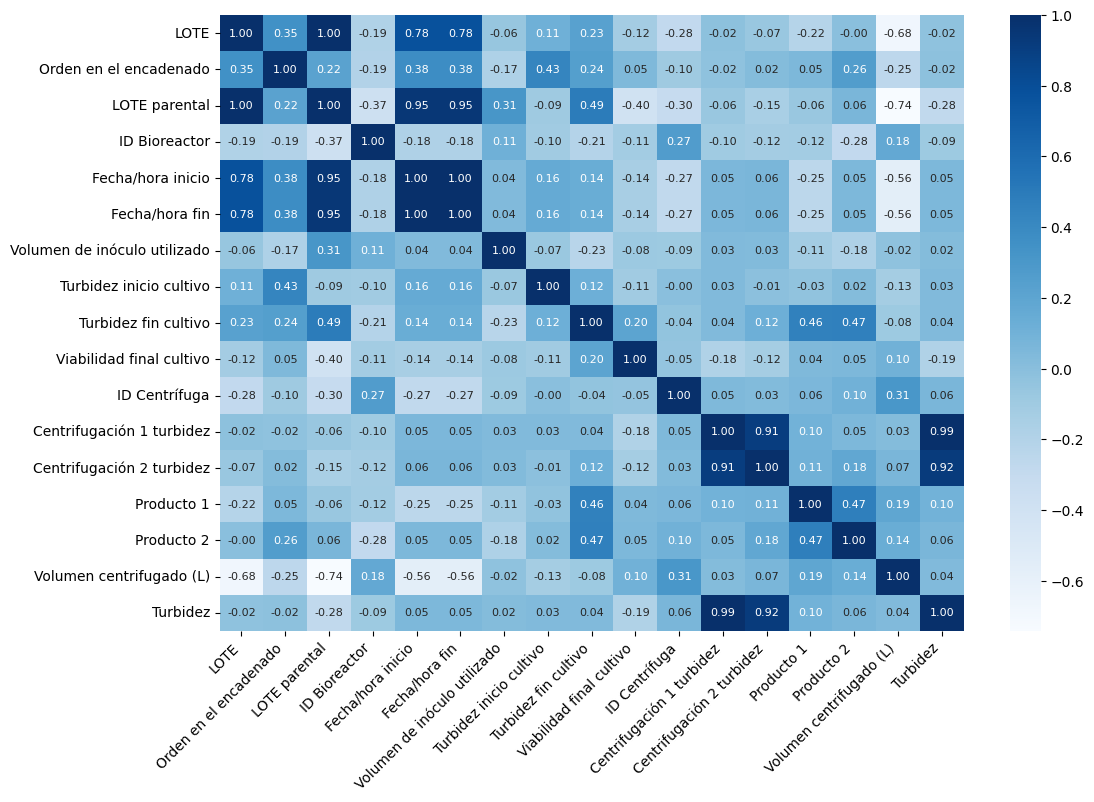

In [67]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Generar el heatmap
sns.heatmap(df_prod_cent_train.corr(), annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="Blues")

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()

In [68]:
# df_prod_cent_train = df_prod_cent_train.drop(["LOTE","LOTE parental","ID Bioreactor","Fecha/hora inicio","Fecha/hora fin","Volumen de inóculo utilizado","Producto 2"],axis=1)
df_prod_cent_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 22 non-null     float64       
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  147 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      151 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     14

In [71]:
df_prod_cent_train = df_prod_cent_train.drop(["Fecha/hora inicio","Fecha/hora fin"],axis='columns')

In [70]:
df_prod_cent_train = df_prod_cent_train.fillna(0)
df_prod_cent_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   LOTE                          152 non-null    int64         
 1   Orden en el encadenado        152 non-null    int64         
 2   LOTE parental                 152 non-null    float64       
 3   ID Bioreactor                 152 non-null    int64         
 4   Fecha/hora inicio             152 non-null    datetime64[ns]
 5   Fecha/hora fin                152 non-null    datetime64[ns]
 6   Volumen de inóculo utilizado  152 non-null    float64       
 7   Turbidez inicio cultivo       152 non-null    float64       
 8   Turbidez fin cultivo          152 non-null    float64       
 9   Viabilidad final cultivo      152 non-null    float64       
 10  ID Centrífuga                 152 non-null    int64         
 11  Centrifugación 1 turbidez     15

In [72]:
df_prod_cent_train = df_prod_cent_train.drop("Turbidez", axis="columns")

In [73]:
X = df_prod_cent_train.drop(["Producto 1"],axis='columns')
y = df_prod_cent_train["Producto 1"]

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que ya tienes tus datos en X e y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y los hiperparámetros a ajustar
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor()
}

# Hiperparámetros para cada modelo
param_grid = {
    'Linear Regression': {},
    'Elastic Net': {'alpha': np.logspace(-3, 3, 7), 'l1_ratio': np.linspace(0, 1, 5)},
    'Random Forest': {'n_estimators': [50, 75], 'max_depth': [3], 'min_samples_split': [2, 5]}
}

# Realizar el Grid Search para cada modelo
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Best CV MSE: {-grid_search.best_score_}")

# Evaluar los modelos en el conjunto de prueba
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    print(f"{name} Test MSE: {mse}, R²: {r2}")

Linear Regression Best Parameters: {}
Linear Regression Best CV MSE: 84414.6281296376


c:\Users\Victor\miniconda3\envs\Thon_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.840e+06, tolerance: 1.209e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Elastic Net Best Parameters: {'alpha': np.float64(1.0), 'l1_ratio': np.float64(0.0)}
Elastic Net Best CV MSE: 79793.67430619332
Random Forest Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 75}
Random Forest Best CV MSE: 74461.08136675086
Linear Regression Test MSE: 24841.97779727893, R²: 0.6290282012612494
Elastic Net Test MSE: 26627.60505922864, R²: 0.6023629589585615
Random Forest Test MSE: 37950.71898497133, R²: 0.4332719157801608


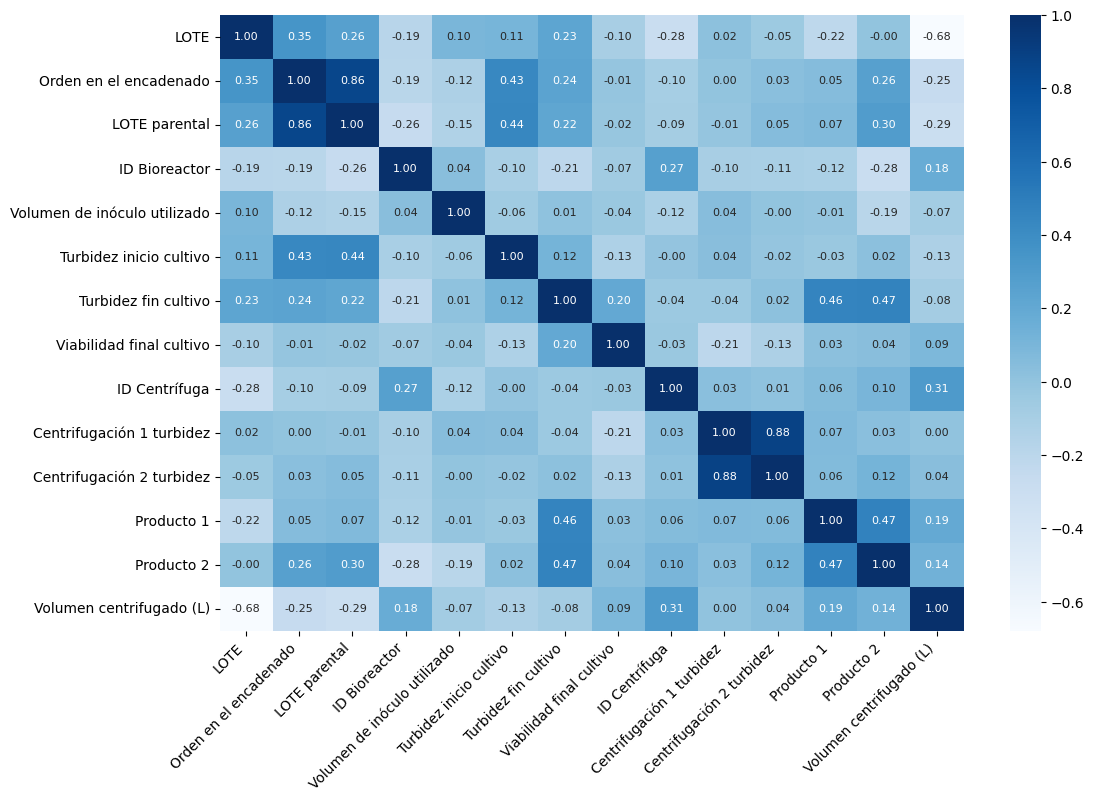

In [75]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Generar el heatmap
sns.heatmap(df_prod_cent_train.corr(), annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="Blues")

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()

In [212]:
df_prod_cent_train

,Orden en el encadenado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Volumen centrifugado (L)
0,1,17.3,91.2,184000000.0,17825,0.0,0.0,1747.9,700.0
1,1,18.8,91.2,182000000.0,14246,0.0,0.0,1676.2,700.0
2,1,16.2,86.4,248000000.0,17825,0.0,0.0,1928.5,700.0
3,1,18.5,83.2,230000000.0,12912,0.0,0.0,1782.8,700.0
4,1,17.1,74.4,133000000.0,17825,26.6,20.9,1861.8,700.0
...,...,...,...,...,...,...,...,...,...
147,1,19.0,73.0,165000000.0,12912,31.0,17.0,1342.8,400.0
148,1,18.0,68.0,152000000.0,6379,29.0,27.0,1422.8,400.0
149,1,18.0,81.0,161000000.0,12912,33.0,19.0,1486.6,400.0
150,2,17.0,69.0,148000000.0,14246,24.0,18.0,1857.3,400.0


Linear Regression Test MSE: 24841.97779727893, R²: 0.6290282012612494


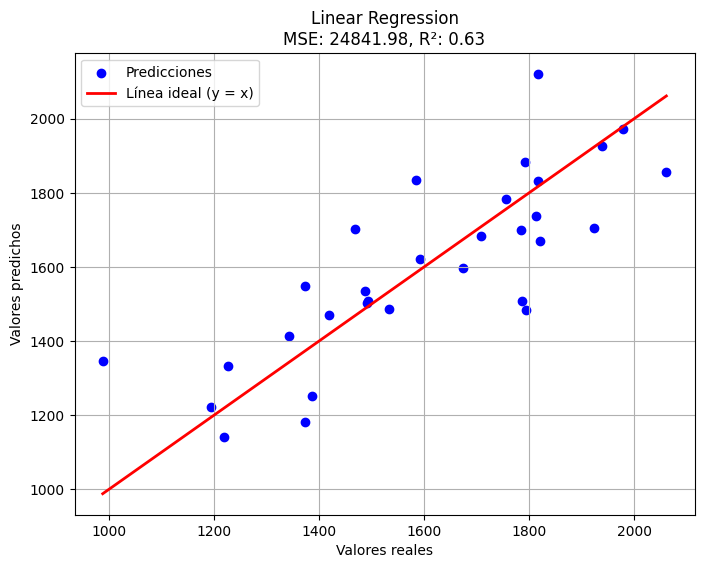

Elastic Net Test MSE: 26627.60505922864, R²: 0.6023629589585615
Random Forest Test MSE: 37950.71898497133, R²: 0.4332719157801608


In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya has entrenado los modelos y evaluado las métricas como en tu código original

# Evaluar los modelos en el conjunto de prueba y generar gráficos para el modelo de regresión lineal
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    
    print(f"{name} Test MSE: {mse}, R²: {r2}")

    # Solo hacer la gráfica para el modelo de regresión lineal
    if name == 'Linear Regression':
        # Crear la gráfica de dispersión para los datos de prueba vs predicción
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, color="blue", label="Predicciones")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, label="Línea ideal (y = x)")
        plt.xlabel("Valores reales")
        plt.ylabel("Valores predichos")
        plt.title(f"Linear Regression\nMSE: {mse:.2f}, R²: {r2:.2f}")
        plt.legend()
        plt.grid(True)
        plt.show()


In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que ya tienes tus datos en X e y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y los hiperparámetros a ajustar
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Polynomial Regression (Grado 2)': LinearRegression(),
    'Polynomial Regression (Grado 3)': LinearRegression()
}

# Hiperparámetros para cada modelo
param_grid = {
    'Linear Regression': {},
    'Elastic Net': {'alpha': np.logspace(-3, 3, 7), 'l1_ratio': np.linspace(0, 1, 5)},
    'Random Forest': {'n_estimators': [50, 75], 'max_depth': [3], 'min_samples_split': [2, 5]},
    'Polynomial Regression (Grado 2)': {},
    'Polynomial Regression (Grado 3)': {}
}

# Crear características polinomiales de grado 2 y 3
poly_2 = PolynomialFeatures(degree=2)
poly_3 = PolynomialFeatures(degree=3)

X_train_poly2 = poly_2.fit_transform(X_train)
X_test_poly2 = poly_2.transform(X_test)

X_train_poly3 = poly_3.fit_transform(X_train)
X_test_poly3 = poly_3.transform(X_test)

# Diccionario para las características transformadas
X_train_dict = {
    'Linear Regression': X_train,
    'Elastic Net': X_train,
    'Random Forest': X_train,
    'Polynomial Regression (Grado 2)': X_train_poly2,
    'Polynomial Regression (Grado 3)': X_train_poly3
}

X_test_dict = {
    'Linear Regression': X_test,
    'Elastic Net': X_test,
    'Random Forest': X_test,
    'Polynomial Regression (Grado 2)': X_test_poly2,
    'Polynomial Regression (Grado 3)': X_test_poly3
}

# Realizar el Grid Search para cada modelo
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_dict[name], y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Best CV MSE: {-grid_search.best_score_}")

# Evaluar los modelos en el conjunto de prueba
for name, model in best_models.items():
    y_pred = model.predict(X_test_dict[name])
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    print(f"{name} Test MSE: {mse}, R²: {r2}")


Linear Regression Best Parameters: {}
Linear Regression Best CV MSE: 84414.6281296376


c:\Users\Victor\miniconda3\envs\Thon_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.840e+06, tolerance: 1.209e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Elastic Net Best Parameters: {'alpha': np.float64(1.0), 'l1_ratio': np.float64(0.0)}
Elastic Net Best CV MSE: 79793.67430619332
Random Forest Best Parameters: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 75}
Random Forest Best CV MSE: 74575.51468038438
Polynomial Regression (Grado 2) Best Parameters: {}
Polynomial Regression (Grado 2) Best CV MSE: 84394505.92506748
Polynomial Regression (Grado 3) Best Parameters: {}
Polynomial Regression (Grado 3) Best CV MSE: 296686723.4248255
Linear Regression Test MSE: 24841.97779727893, R²: 0.6290282012612494
Elastic Net Test MSE: 26627.60505922864, R²: 0.6023629589585615
Random Forest Test MSE: 39926.972963952896, R²: 0.4037599944939374
Polynomial Regression (Grado 2) Test MSE: 5812411.602132452, R²: -85.79827365795504
Polynomial Regression (Grado 3) Test MSE: 585733324.6284426, R²: -8745.910040409219


In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que ya tienes tus datos en X e y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y los hiperparámetros a ajustar
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Polynomial Regression (Grado 2)': LinearRegression(),
    'Polynomial Regression (Grado 3)': LinearRegression()
}

# Hiperparámetros para cada modelo
param_grid = {
    'Linear Regression': {},
    'Elastic Net': {'alpha': np.logspace(-3, 3, 7), 'l1_ratio': np.linspace(0, 1, 5)},
    'Random Forest': {'n_estimators': [50, 75], 'max_depth': [3], 'min_samples_split': [2, 5]},
    'Polynomial Regression (Grado 2)': {},
    'Polynomial Regression (Grado 3)': {}
}

# Crear características polinomiales de grado 2 y 3
poly_2 = PolynomialFeatures(degree=2)
poly_3 = PolynomialFeatures(degree=3)

X_train_poly2 = poly_2.fit_transform(X_train)
X_test_poly2 = poly_2.transform(X_test)

X_train_poly3 = poly_3.fit_transform(X_train)
X_test_poly3 = poly_3.transform(X_test)

# Diccionario para las características transformadas
X_train_dict = {
    'Linear Regression': X_train,
    'Elastic Net': X_train,
    'Random Forest': X_train,
    'Polynomial Regression (Grado 2)': X_train_poly2,
    'Polynomial Regression (Grado 3)': X_train_poly3
}

X_test_dict = {
    'Linear Regression': X_test,
    'Elastic Net': X_test,
    'Random Forest': X_test,
    'Polynomial Regression (Grado 2)': X_test_poly2,
    'Polynomial Regression (Grado 3)': X_test_poly3
}

# Realizar el Grid Search para cada modelo
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_dict[name], y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Best CV MSE: {-grid_search.best_score_}")

# Evaluar los modelos en el conjunto de prueba
for name, model in best_models.items():
    y_pred = model.predict(X_test_dict[name])
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    print(f"{name} Test MSE: {mse}, R²: {r2}")


Linear Regression Best Parameters: {}
Linear Regression Best CV MSE: 84414.6281296376
Elastic Net Best Parameters: {'alpha': np.float64(1.0), 'l1_ratio': np.float64(0.0)}
Elastic Net Best CV MSE: 79793.67430619332


c:\Users\Victor\miniconda3\envs\Thon_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.840e+06, tolerance: 1.209e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Random Forest Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 75}
Random Forest Best CV MSE: 75720.26028004888
Polynomial Regression (Grado 2) Best Parameters: {}
Polynomial Regression (Grado 2) Best CV MSE: 84394505.92506748
Polynomial Regression (Grado 3) Best Parameters: {}
Polynomial Regression (Grado 3) Best CV MSE: 296686723.4248255
Linear Regression Test MSE: 24841.97779727893, R²: 0.6290282012612494
Elastic Net Test MSE: 26627.60505922864, R²: 0.6023629589585615
Random Forest Test MSE: 35817.66403289739, R²: 0.46512538730472464
Polynomial Regression (Grado 2) Test MSE: 5812411.602132452, R²: -85.79827365795504
Polynomial Regression (Grado 3) Test MSE: 585733324.6284426, R²: -8745.910040409219


Linear Regression Best Parameters: {}
Linear Regression Best CV MSE: 84414.6281296376
Elastic Net Best Parameters: {'alpha': np.float64(1.0), 'l1_ratio': np.float64(0.0)}
Elastic Net Best CV MSE: 79793.67430619332


c:\Users\Victor\miniconda3\envs\Thon_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.840e+06, tolerance: 1.209e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Random Forest Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best CV MSE: 75931.88987837179
Polynomial Regression (Grado 2) Best Parameters: {}
Polynomial Regression (Grado 2) Best CV MSE: 84394505.92506748
Linear Regression Test MSE: 24841.97779727893, R²: 0.6290282012612494


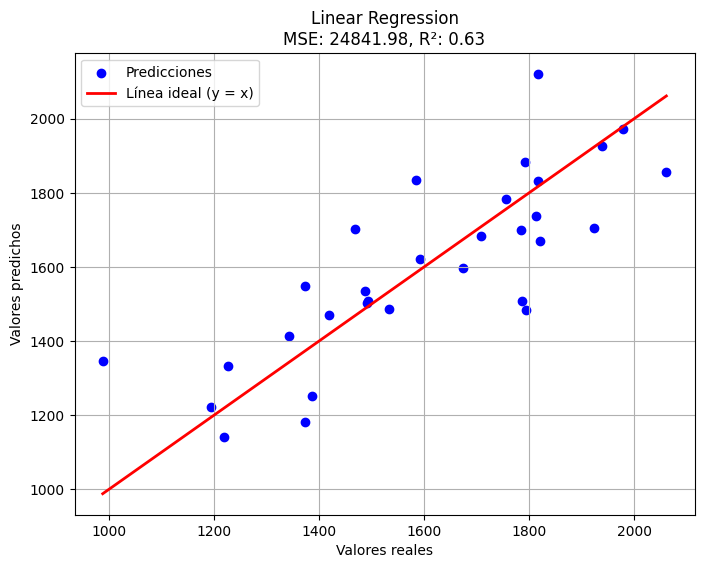

Elastic Net Test MSE: 26627.60505922864, R²: 0.6023629589585615
Random Forest Test MSE: 43219.24661932061, R²: 0.35459560469218254
Polynomial Regression (Grado 2) Test MSE: 5812411.602132452, R²: -85.79827365795504


ValueError: x and y must be the same size

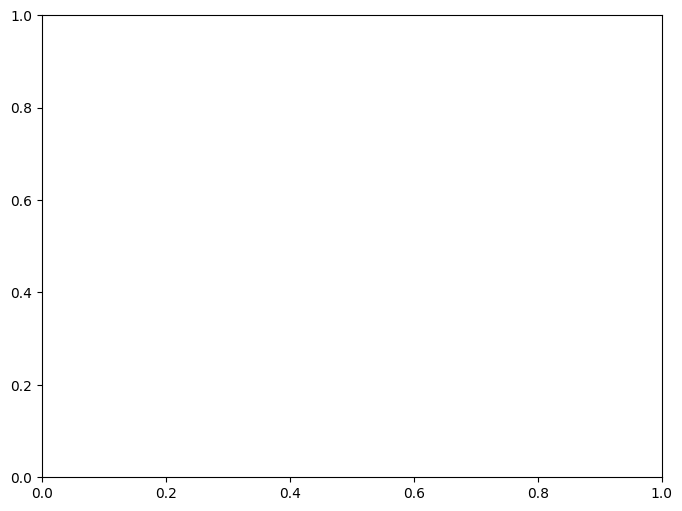

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que ya tienes tus datos en X e y
# Asegúrate de que X tenga una sola característica para facilitar la visualización

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos y los hiperparámetros a ajustar
models = {
    'Linear Regression': LinearRegression(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Polynomial Regression (Grado 2)': LinearRegression()
}

# Hiperparámetros para cada modelo
param_grid = {
    'Linear Regression': {},
    'Elastic Net': {'alpha': np.logspace(-3, 3, 7), 'l1_ratio': np.linspace(0, 1, 5)},
    'Random Forest': {'n_estimators': [50, 75], 'max_depth': [3], 'min_samples_split': [2, 5]},
    'Polynomial Regression (Grado 2)': {}
}

# Transformar las características para la regresión polinómica
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear un nuevo diccionario para X que incluya las características polinómicas
X_train_dict = {
    'Linear Regression': X_train,
    'Elastic Net': X_train,
    'Random Forest': X_train,
    'Polynomial Regression (Grado 2)': X_train_poly
}

X_test_dict = {
    'Linear Regression': X_test,
    'Elastic Net': X_test,
    'Random Forest': X_test,
    'Polynomial Regression (Grado 2)': X_test_poly
}

# Realizar el Grid Search para cada modelo
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_dict[name], y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Best CV MSE: {-grid_search.best_score_}")

# Evaluar los modelos en el conjunto de prueba y generar gráficos para la regresión lineal y polinómica
for name, model in best_models.items():
    y_pred = model.predict(X_test_dict[name])
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)  # Calcular R²
    
    print(f"{name} Test MSE: {mse}, R²: {r2}")

    # Gráfica para la regresión lineal
    if name == 'Linear Regression':
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, color="blue", label="Predicciones")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, label="Línea ideal (y = x)")
        plt.xlabel("Valores reales")
        plt.ylabel("Valores predichos")
        plt.title(f"Linear Regression\nMSE: {mse:.2f}, R²: {r2:.2f}")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Gráfica para la regresión polinómica de grado 2
    if name == 'Polynomial Regression (Grado 2)':
        # Asegúrate de que X_test sea un array unidimensional
        X_test_1d = X_test.to_numpy().ravel()  # Usar to_numpy() y ravel() para aplanar

        plt.figure(figsize=(8, 6))
        plt.scatter(X_test_1d, y_test, color='blue', label='Datos Reales')

        # Para graficar la curva polinómica, crea un rango de valores
        X_range = np.linspace(X_test_1d.min(), X_test_1d.max(), 100).reshape(-1, 1)
        X_range_poly = poly.transform(X_range)
        y_range_pred = model.predict(X_range_poly)

        plt.plot(X_range, y_range_pred, color='red', label='Predicciones (Grado 2)')
        plt.title(f"Polynomial Regression (Grado 2)\nMSE: {mse:.2f}, R²: {r2:.2f}")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.legend()
        plt.grid(True)
        plt.show()
